In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels
import statsmodels.api as sm
from string import digits
import seaborn as sns

C:\Users\Jane.000\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# importing data, getting dimensions
homes = pd.read_csv("Documents\super_realestate_data.csv")

In [3]:
# remove_digits = str.maketrans('', '', digits) 
# homes['neighborhood'] = homes['street address'].str.translate(remove_digits)
# len(homes['neighborhood'].unique())

In [4]:
# cleaning data and setting types
homes['bath'] = homes['bath'].str.replace("+", "")

homes['bath'] = pd.to_numeric(homes['bath'])
homes['sqft'] = pd.to_numeric(homes['sqft'])
homes['price'] = pd.to_numeric(homes['price'])

In [5]:
corr = homes.corr()
corr

,listing id,postal code,latitude,longitude,price,bed,bath,sqft,garage
listing id,1.000000,-0.090484,0.033516,0.051818,0.058028,-0.043378,0.060628,0.017295,-0.072630
postal code,-0.090484,1.000000,-0.343275,-0.078753,-0.109089,-0.074490,-0.334695,-0.264800,0.126810
latitude,0.033516,-0.343275,1.000000,-0.217606,0.141361,0.097429,0.264340,0.280295,0.320580
longitude,0.051818,-0.078753,-0.217606,1.000000,-0.036771,-0.035500,0.033231,0.004860,-0.564365
price,0.058028,-0.109089,0.141361,-0.036771,1.000000,0.280439,0.402549,0.487603,0.731065
bed,-0.043378,-0.074490,0.097429,-0.035500,0.280439,1.000000,0.468309,0.635567,0.558227
bath,0.060628,-0.334695,0.264340,0.033231,0.402549,0.468309,1.000000,0.757952,0.094763
sqft,0.017295,-0.264800,0.280295,0.004860,0.487603,0.635567,0.757952,1.000000,0.538251
garage,-0.072630,0.126810,0.320580,-0.564365,0.731065,0.558227,0.094763,0.538251,1.000000


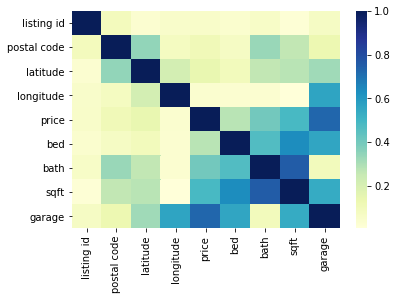

In [6]:
sns.heatmap(abs(corr), 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="YlGnBu")

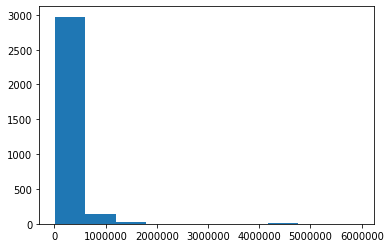

In [7]:
plt.hist(homes['price'])
plt.show()

In [8]:
homes['price'].describe()

count    3.145000e+03
mean     2.983172e+05
std      3.023897e+05
min      7.000000e+03
25%      1.680000e+05
50%      2.400000e+05
75%      3.530000e+05
max      5.947500e+06
Name: price, dtype: float64

In [9]:
# choosing specific collumns, removing the rest 
homes = homes[['prop type', 'city', 'postal code', 'price', 'bed', 'bath', 'sqft']]
homes = homes[homes["postal code"] != 43082]
homes = homes[homes["postal code"] !=  43103]
homes = homes[homes["postal code"] != 43015]


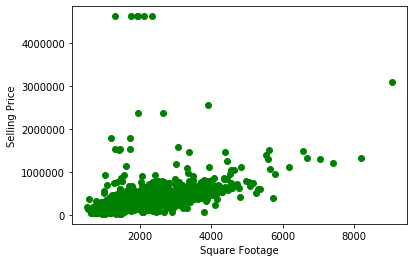

In [10]:
# Plotting the first realtionship between square feet and price
plt.scatter(homes['sqft'], homes['price'], color='g')
plt.xlabel('Square Footage')
plt.ylabel('Selling Price')
plt.show()

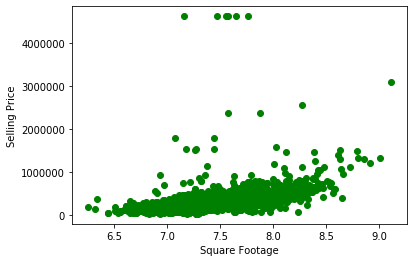

In [11]:
#Testing a log transformation
plt.scatter(np.log(homes['sqft']), homes['price'], color='g')
plt.xlabel('Square Footage')
plt.ylabel('Selling Price')
plt.show()

In [12]:
homes["log sqft"] = np.log(homes["sqft"])
homes[["price", "log sqft", "sqft"]].corr()

,price,log sqft,sqft
price,1.000000,0.449798,0.483501
log sqft,0.449798,1.000000,0.956693
sqft,0.483501,0.956693,1.000000


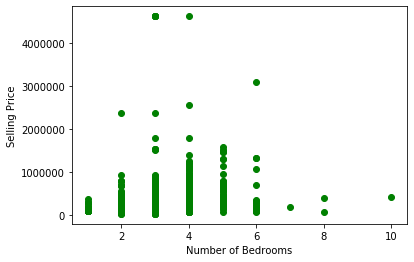

In [13]:
# Plotting the first realtionship between square feet and price
plt.scatter(homes['bed'], homes['price'], color='g')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Selling Price')
plt.show()

Text(0.5, 1.0, 'Selling Price by City')

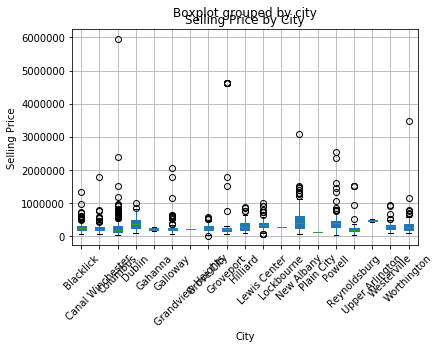

In [14]:
homes.boxplot(column='price', by='city', patch_artist=True)
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Selling Price')
plt.title("Selling Price by City")

In [15]:
homes.groupby("city").describe()

postal code                                              \
                        count          mean        std      min       25%   
city                                                                        
Blacklick               236.0  43004.000000   0.000000  43004.0  43004.00   
Canal Winchester        246.0  43110.000000   0.000000  43110.0  43110.00   
Columbus                680.0  43217.185294  15.864887  43081.0  43207.00   
Dublin                  256.0  43016.449219   0.498389  43016.0  43016.00   
Gahanna                   2.0  43230.000000   0.000000  43230.0  43230.00   
Galloway                148.0  43119.000000   0.000000  43119.0  43119.00   
Grandview Heights         1.0  43212.000000        NaN  43212.0  43212.00   
Grove City              156.0  43123.000000   0.000000  43123.0  43123.00   
Groveport               105.0  43125.000000   0.000000  43125.0  43125.00   
Hilliard                149.0  43026.000000   0.000000  43026.0  43026.00   
Lewis Center            198.0  43035.000000   0.000000  43035.0  43035.00   
Lockbourne                2.0  43137.000000   0.000000  43137.0  43137.00   
New Albany              200.0  43054.000000   0.000000  43054.0  43054.00   
Plain City                1.0  43064.000000        NaN  43064.0  43064.00   
Powell                  143.0  43065.000000   0.000000  43065.0  43065.00   
Reynoldsburg            227.0  43068.000000   0.000000  43068.0  43068.00   
Upper Arlington           2.0  43220.500000   0.707107  43220.0  43220.25   
Westerville             170.0  43081.000000   0.000000  43081.0  43081.00   
Worthington             141.0  43085.000000   0.000000  43085.0  43085.00   

                                               price                 ...  \
                       50%       75%      max  count           mean  ...   
city                                                                 ...   
Blacklick          43004.0  43004.00  43004.0  236.0  256764.576271  ...   
Canal Winchester   43110.0  43110.00  43110.0  246.0  231681.276423  ...   
Columbus           43220.0  43228.00  43240.0  680.0  242431.285294  ...   
Dublin             43016.0  43017.00  43017.0  256.0  374167.277344  ...   
Gahanna            43230.0  43230.00  43230.0    2.0  202500.000000  ...   
Galloway           43119.0  43119.00  43119.0  148.0  250779.729730  ...   
Grandview Heights  43212.0  43212.00  43212.0    1.0  205000.000000  ...   
Grove City         43123.0  43123.00  43123.0  156.0  236541.666667  ...   
Groveport          43125.0  43125.00  43125.0  105.0  470051.314286  ...   
Hilliard           43026.0  43026.00  43026.0  149.0  291594.697987  ...   
Lewis Center       43035.0  43035.00  43035.0  198.0  343136.030303  ...   
Lockbourne         43137.0  43137.00  43137.0    2.0  260000.000000  ...   
New Albany         43054.0  43054.00  43054.0  200.0  472950.000000  ...   
Plain City         43064.0  43064.00  43064.0    1.0  107300.000000  ...   
Powell             43065.0  43065.00  43065.0  143.0  424980.048951  ...   
Reynoldsburg       43068.0  43068.00  43068.0  227.0  207212.334802  ...   
Upper Arlington    43220.5  43220.75  43221.0    2.0  460000.000000  ...   
Westerville        43081.0  43081.00  43081.0  170.0  273506.264706  ...   
Worthington        43085.0  43085.00  43085.0  141.0  310724.113475  ...   

                      sqft         log sqft                                \
                       75%     max    count      mean       std       min   
city                                                                        
Blacklick          2222.00  8179.0    205.0  7.455239  0.388698  6.797940   
Canal Winchester   2049.25  3881.0    196.0  7.408603  0.321937  6.664409   
Columbus           1751.00  5724.0    633.0  7.259561  0.358121  6.253829   
Dublin             2849.00  4788.0    237.0  7.620810  0.412147  6.793466   
Gahanna            1783.50  1800.0      2.0  7.476864  0.026415  7.458186   
Galloway           1829.25  5312.0

Text(0, 0.5, 'Square Footage')

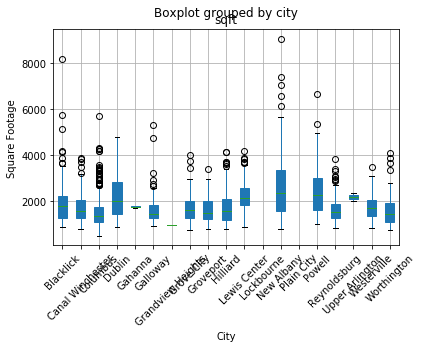

In [16]:
homes.boxplot(column='sqft', by='city', patch_artist=True)
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Square Footage')

Text(0.5, 1.0, 'Selling Price by Number of Bedrooms')

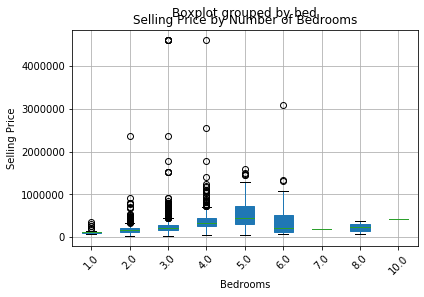

In [17]:
homes.boxplot(column='price', by='bed', patch_artist=True)
plt.xticks(rotation=45)
plt.xlabel('Bedrooms')
plt.ylabel('Selling Price')
plt.title("Selling Price by Number of Bedrooms")

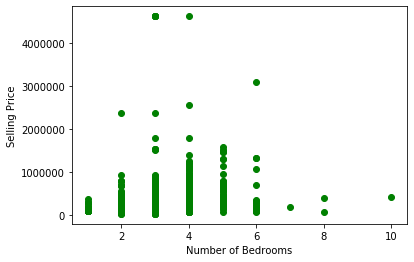

In [18]:
#Not linear
plt.scatter(homes['bed'], homes['price'], color='g')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Selling Price')
plt.show()

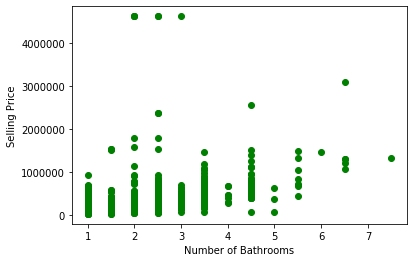

In [19]:
plt.scatter(homes['bath'], homes['price'], color='g')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Selling Price')
plt.show()

Text(0.5, 1.0, 'Selling Price by Number of Bathrooms')

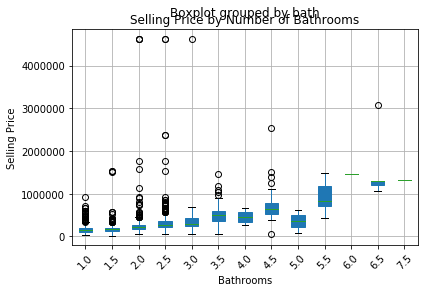

In [20]:
homes.boxplot(column='price', by='bath', patch_artist=True)
plt.xticks(rotation=45)
plt.xlabel('Bathrooms')
plt.ylabel('Selling Price')
plt.title("Selling Price by Number of Bathrooms")

Text(0.5, 1.0, 'Selling Price by Property Type')

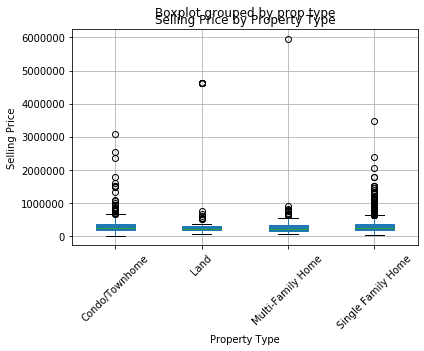

In [21]:
homes.boxplot(column='price', by='prop type', patch_artist=True)
plt.xticks(rotation=45)
plt.xlabel('Property Type')
plt.ylabel('Selling Price')
plt.title("Selling Price by Property Type")

In [22]:
homes.groupby("prop type").describe()

postal code                                             \
                         count          mean        std      min      25%   
prop type                                                                   
Condo/Townhome           782.0  43097.735294  72.104084  43004.0  43054.0   
Land                      88.0  43065.068182  60.507774  43004.0  43004.0   
Multi-Family Home        132.0  43180.212121  65.301769  43016.0  43182.0   
Single Family Home      2061.0  43095.790393  71.115438  43004.0  43035.0   

                                                price                 ...  \
                        50%      75%      max   count           mean  ...   
prop type                                                             ...   
Condo/Townhome      43081.0  43125.0  43240.0   782.0  300408.808184  ...   
Land                43089.5  43125.0  43125.0    88.0  530746.590909  ...   
Multi-Family Home   43207.0  43221.5  43235.0   132.0  308922.727273  ...   
Single Family Home  43081.0  43123.0  43240.0  2061.0  284061.905386  ...   

                      sqft         log sqft                                \
                       75%     max    count      mean       std       min   
prop type                                                                   
Condo/Townhome      2223.5  9052.0    712.0  7.451783  0.400555  6.436150   
Land                1912.0  3438.0     75.0  7.336672  0.337776  6.677083   
Multi-Family Home   1889.5  4346.0    119.0  7.286196  0.386677  6.253829   
Single Family Home  2190.0  8179.0   1874.0  7.439947  0.395105  6.313548   

                                                            
                         25%       50%       75%       max  
prop type                                                   
Condo/Townhome      7.166073  7.410347  7.706838  9.110741  
Land                7.111511  7.340836  7.555903  8.142645  
Multi-Family Home   7.088407  7.287561  7.544055  8.377011  
Single Family Home  7.154615  7.402452  7.691657  9.009325  

[4 rows x 48 columns]

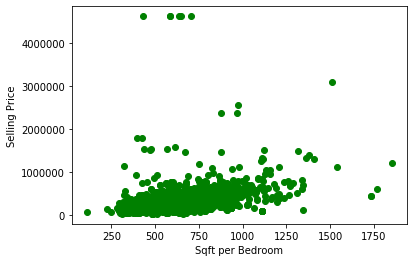

In [23]:
#Much more linear than bedrooms
homes["sqft per bed"] = homes['sqft']/homes['bed']
plt.scatter(homes["sqft per bed"], homes['price'], color='g')
plt.xlabel('Sqft per Bedroom')
plt.ylabel('Selling Price')
plt.show()

In [24]:
homes["log sqft"] = np.log(homes["sqft"])
homes[["price", "sqft per bed", "bed"]].corr()

,price,sqft per bed,bed
price,1.000000,0.365801,0.277694
sqft per bed,0.365801,1.000000,0.002065
bed,0.277694,0.002065,1.000000


In [25]:
##Drop NaN values found in sqft and resetting index 
homes.dropna(inplace = True)
homes.reset_index(drop=True, inplace = True)
homes.head(5)

,prop type,city,postal code,price,bed,bath,sqft,log sqft,sqft per bed
0,Condo/Townhome,Dublin,43016,240000,3.0,2.0,1544.0,7.342132,514.666667
1,Condo/Townhome,Westerville,43081,179900,2.0,2.0,1466.0,7.290293,733.000000
2,Condo/Townhome,Westerville,43081,404000,3.0,3.0,2400.0,7.783224,800.000000
3,Condo/Townhome,Columbus,43240,245000,2.0,3.5,2058.0,7.629490,1029.000000
4,Condo/Townhome,Columbus,43206,198000,2.0,1.0,1215.0,7.102499,607.500000


In [26]:
# I do not want to include land properties in this analysis so I will sort them out 
homes['prop type'].unique()

# removing property type land:
homes = homes[(homes['prop type'] != 'Land')]

In [27]:
# Preparing to make ML model for SLR
x = homes['sqft'].values.reshape(-1,1)
y = homes['price'].values.reshape(-1,1)

In [28]:
# Splits data into testing vs training set then creats model 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print(regressor.intercept_)
print(regressor.coef_)

[-30493.61018466]
[[167.67083222]]


In [29]:
# Outputs actual selling price vs model prediction
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head(5)

,Actual,Predicted
0,280000,116386.038841
1,375000,353137.253936
2,203000,253205.437933
3,443000,362191.478876
4,96500,155788.684413


In [30]:
# Now I start with MLR

In [31]:
# Seeing how many homes I still have in my data set
homes.shape

(2704, 9)

In [32]:
# Single Family vs not
#homes['Single Family?'] = homes.apply(lambda x: (1 if x['prop type'] == 'Single Family Home' else 0), axis=1)

In [33]:
# We have 15 unique cities
# cities = homes['city'].unique()
# for city in cities:
#     homes[city] = homes.apply(lambda x: (1 if x['city'] == city else 0), axis=1)

In [35]:
# X = homes[['bath', 'sqft', 'sqft per bed', 'Westerville', 'Blacklick', 'Columbus', 
#           'Grove City', 'Dublin', 'Canal Winchester', 'Groveport', 
#           'Worthington', 'Hilliard', 'New Albany', 'Galloway', 'Reynoldsburg', 
#           'Powell', 'Lewis Center']]

X = homes[['bath', 'sqft', 'sqft per bed']]
Y = homes['price']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
model= regressor.fit(X_train, y_train) 
print('Intercept: \n', regressor.intercept_)
print('Coefficients: \n', regressor.coef_)

Intercept: 
 -65656.61244961788
Coefficients: 
 [25583.31162009   144.67904792    37.01237028]


In [37]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [38]:
df.head(10)

,Actual,Predicted
92,280000,123056.468892
2106,375000,337706.748234
897,203000,263973.592522
2676,443000,353242.664755
1118,96500,174577.520605
2167,725000,801149.508158
2250,120000,188144.999404
1272,315000,86232.069561
1484,501500,445782.399009
2773,554000,295498.765441


In [39]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     797.6
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:02:10   Log-Likelihood:                -36013.
No. Observations:                2704   AIC:                         7.203e+04
Df Residuals:                    2700   BIC:                         7.206e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -5.539e+04   1.02e+04     -5.433   

In [40]:
# We have 15 unique cities
zip_codes = homes['postal code'].unique()
for zip_code in zip_codes:
    homes[zip_code] = homes.apply(lambda x: (1 if x['postal code'] == zip_code else 0), axis=1)

homes["postal code"].unique()

array([43016, 43081, 43240, 43206, 43223, 43215, 43123, 43211, 43230,
       43110, 43209, 43227, 43201, 43205, 43219, 43228, 43125, 43085,
       43220, 43054, 43221, 43026, 43231, 43224, 43235, 43204, 43119,
       43068, 43229, 43232, 43207, 43004, 43203, 43222, 43065, 43017,
       43213, 43202, 43214, 43212, 43035], dtype=int64)

In [41]:
homes

,prop type,city,postal code,price,bed,bath,sqft,log sqft,sqft per bed,43016,...,43004,43203,43222,43065,43017,43213,43202,43214,43212,43035
0,Condo/Townhome,Dublin,43016,240000,3.0,2.0,1544.0,7.342132,514.666667,1,...,0,0,0,0,0,0,0,0,0,0
1,Condo/Townhome,Westerville,43081,179900,2.0,2.0,1466.0,7.290293,733.000000,0,...,0,0,0,0,0,0,0,0,0,0
2,Condo/Townhome,Westerville,43081,404000,3.0,3.0,2400.0,7.783224,800.000000,0,...,0,0,0,0,0,0,0,0,0,0
3,Condo/Townhome,Columbus,43240,245000,2.0,3.5,2058.0,7.629490,1029.000000,0,...,0,0,0,0,0,0,0,0,0,0
4,Condo/Townhome,Columbus,43206,198000,2.0,1.0,1215.0,7.102499,607.500000,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774,Single Family Home,Lewis Center,43035,519500,4.0,2.5,2796.0,7.935945,699.000000,0,...,0,0,0,0,0,0,0,0,0,1
2775,Single Family Home,Lewis Center,43035,340000,4.0,2.5,2516.0,7.830426,629.000000,0,...,0,0,0,0,0,0,0,0,0,1
2776,Single Family Home,Lewis Center,43035,379000,4.0,2.5,2553.0,7.845024,638.250000,0,...,0,0,0,0,0,0,0,0,0,1
2777,Single Family Home,Lewis Center,43035,428000,4.0,3.5,3484.0,8.155936,871.000000,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
# X = homes[['bath', 'sqft', 'sqft per bed', 'Westerville', 'Blacklick', 
#            'Columbus', 'Grove City', 'Dublin', 'Canal Winchester', 
#            'Groveport', 'Worthington', 'Hilliard', 'New Albany', 'Galloway', 
#            'Reynoldsburg', 'Powell', 'Lewis Center', '43016', '43081', '43240', 
#            '43206', '43223', '43215', '43123', '43211', '43230','43110', '43209', 
#            '43227', '43201', '43205', '43219', '43228', '43125', '43085','43220', 
#            '43054', '43221', '43026', '43231', '43224', '43235', '43204', '43119',
#            '43068', '43229', '43232', '43207', '43004', '43203', '43222', '43065', 
#            '43017','43213', '43202', '43214', '43212', '43035']]

# X = homes[['bath', 'sqft', 'sqft per bed', 'Westerville', 'Blacklick', 
#            'Columbus', 'Grove City', 'Dublin', 'Canal Winchester', 
#            'Groveport', 'Worthington', 'Hilliard', 'New Albany', 'Galloway', 
#            'Reynoldsburg', 'Powell', 'Lewis Center', 43016, 43081, 43240, 43206, 43223, 43215, 43123, 43211, 43230,
#        43110, 43209, 43227, 43201, 43205, 43219, 43228, 43125, 43085,
#        43220, 43054, 43221, 43026, 43231, 43224, 43235, 43204, 43119,
#        43068, 43229, 43232, 43207, 43004, 43203, 43222, 43065, 43017,
#        43213, 43202, 43214, 43212, 43035]]

X = homes[['bath', 'sqft', 'sqft per bed',43016, 43081, 43240, 43206, 43223, 43215, 43123, 43211, 43230,
       43110, 43209, 43227, 43201, 43205, 43219, 43228, 43125, 43085,
       43220, 43054, 43221, 43026, 43231, 43224, 43235, 43204, 43119,
       43068, 43229, 43232, 43207, 43004, 43203, 43222, 43065, 43017,
       43213, 43202, 43214, 43212, 43035]]

Y = homes['price']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
model= regressor.fit(X_train, y_train) 
print('Intercept: \n', regressor.intercept_)
print('Coefficients: \n', regressor.coef_)

Intercept: 
 -16966.818343952065
Coefficients: 
 [ 2.26369254e+04  1.46270012e+02 -2.78235932e+01  1.31693942e+04
 -1.45831707e+04 -2.89018728e+04 -4.49979449e+04 -6.86053958e+04
  3.69958437e+05 -3.50994431e+04 -5.29758541e+04  1.66598635e+03
 -5.77338266e+04  1.78584079e+04 -5.03384680e+04  1.30961859e+05
 -3.58641860e+04 -3.53887493e+04 -2.36581054e+04 -3.90749584e+04
  4.44289022e+04  5.00685883e+04  5.13400884e+04  1.19740001e+05
 -7.09225004e+03 -2.40791718e+04 -3.96359040e+04 -9.94946271e+03
 -4.42515386e+04 -1.81452243e+04 -4.35543977e+04 -4.45705990e+04
 -7.48105962e+04 -5.08402914e+04 -5.81501113e+04 -2.02693402e+05
 -4.80537150e+04  7.15320470e+04  3.15581678e+04 -6.98083727e+04
  4.56378885e+04  1.10132156e+05  1.76380425e+05 -1.15753375e+04]


In [45]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [46]:
df.head(10)

,Actual,Predicted
92,280000,268055.074333
2106,375000,398397.812481
897,203000,264329.598507
2676,443000,337575.110781
1118,96500,90432.429478
2167,725000,816021.033069
2250,120000,186801.144962
1272,315000,73015.922549
1484,501500,476169.790869
2773,554000,297799.536928


In [47]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     70.59
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:02:15   Log-Likelihood:                -35842.
No. Observations:                2704   AIC:                         7.177e+04
Df Residuals:                    2660   BIC:                         7.203e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4177.2083   1.09e+04     -0.383   

In [64]:
for_sale = pd.read_csv("Downloads\Geocoded ForSale - Sheet1.csv")
for_sale = for_sale.dropna()
for_sale = for_sale[(for_sale["bed"] != 'Studio')]
full_data = for_sale
for_sale = for_sale[["postal code", "bed", "bath", "sqft"]]

for_sale["bath"] = for_sale["bath"].str.replace("+", "")
#for_sale["bed"] = for_sale["bed"].str.replace("+", "")
for_sale["sqft"] = for_sale.sqft.str.replace(",", "")

# for_sale["sqft"] = for_sale[for_sale["sqft"] is null]
#bad_data = for_sale[(for_sale["bath"] == "1.5+")]
#for_sale = for_sale[for_sale["postal code"] in homes["postal code"]]

for_sale['bath'] = pd.to_numeric(for_sale['bath'])
for_sale['sqft'] = pd.to_numeric(for_sale['sqft'])
for_sale['bed'] = pd.to_numeric(for_sale['bed'])
for_sale["sqft per bed"] = for_sale["sqft"]/for_sale["bed"]
zip_codes = homes['postal code'].unique()
for zip_code in zip_codes:
    for_sale[zip_code] = for_sale.apply(lambda x: (1 if x['postal code'] == zip_code else 0), axis=1)


del for_sale["postal code"] 
del for_sale["bed"]
#for_sale.head()




C:\Users\Jane.000\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
C:\Users\Jane.000\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Jane.000\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\

In [65]:
#zip_codes

In [66]:
#print((list(set(zip_codes) - set(for_sale["postal code"].unique()))))
#del for_sale["postal code"]

In [67]:
for_sale["estimate"] = regressor.predict(for_sale)

In [68]:
full_data["estimate"] = for_sale["estimate"]

In [69]:
full_data.to_csv("Documents\data_for_tableau_2.csv")